# Logistic Regression

Logistic regression is a statistical method used for binary classification. The goal is to predict the probability that a given input belongs to one of two classes (e.g. 0 or 1).

## How does Logistic Regression work?

1. Linear combination of inputs is calculated
2. The linear combination of inputs is passed through a sigmoid function to map the result to a value between 0 and 1
3. To make a classfication, a threshold is set, if larger than threshold it is 1, if less it is 0
4. Training the model
5. Optimization

## Advantages vs Disadvantages

**Advantages**
1. Simple
2. Efficient (less computer resources used)
3. Easy to interpret

**Disadvantages**

1. Poor performance when large sets of features
2. Outliers can potentially impact the decision threshold


References:

https://www.ahajournals.org/doi/full/10.1161/CIRCULATIONAHA.106.682658

https://ceur-ws.org/Vol-2124/paper_12.pdf

https://link.springer.com/book/10.1007/978-1-4419-1742-3



# Data Preprocessing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
directory = '/content/drive/MyDrive/uvic_capstone_project'
os.chdir(directory)

Mounted at /content/drive


In [ ]:
import pandas as pd

# UVIC Dataset
# file_path = '../../datasets/CaptstoneProjectData_2024.csv'
file_path = 'CaptstoneProjectData_2024.csv'
uvicData = pd.read_csv(file_path)

# Remove unnecessary columns
uvicData_cleaned = uvicData.drop(columns=['Unnamed: 2', 'Unnamed: 3'], errors='ignore')

# Replace empty 'Subject' with space
uvicData_cleaned['Subject'] = uvicData_cleaned['Subject'].fillna(' ')

# Check and remove rows with missing 'Body'
data_cleaned = uvicData_cleaned.dropna(subset=['Body'])

# Normalize text: convert to lowercase, remove special characters, and trim whitespaces
uvicData_cleaned['Subject'] = uvicData_cleaned['Subject'].str.lower().str.replace('[^\w\s]', '', regex=True).str.strip()
uvicData_cleaned['Body'] = uvicData_cleaned['Body'].str.lower().str.replace('[^\w\s]', '', regex=True).str.strip()

# Confirm cleaning
print(uvicData_cleaned.head())

                                             Subject  \
0  review your shipment details  shipment notific...   
1                            υоur ассоunt іѕ оn hоld   
2  completed invoice  kz89tys2564 frombestbuycom ...   
3                              uvic important notice   
4             you have 6 suspended incoming messages   

                                                Body  
0  notice this message was sent from outside the ...  
1  votre réponse a bien été prise en compte\r\nht...  
2  notice this message was sent from outside the ...  
3  your uvic account has been filed under the lis...  
4  message generated from  uvicca source\r\n\r\n\...  


In [ ]:
# Load the normal emails dataset
# file_path = '../../datasets/emails.csv'
file_path = 'emails.csv'

normData = pd.read_csv(file_path)
normData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517401 entries, 0 to 517400
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   file     517401 non-null  object
 1   message  517401 non-null  object
dtypes: object(2)
memory usage: 7.9+ MB


In [ ]:
normData.head()

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


In [ ]:
def parse_email(message):
    lines = message.split('\n')
    subject = next((line.split(": ", 1)[1] for line in lines if line.lower().startswith('subject: ')), "")
    body_start = next(i for i, line in enumerate(lines) if line.strip() == '') + 1
    body = "\n".join(lines[body_start:])
    return subject, body

# Apply the function to the 'message' column
normData[['Subject', 'Body']] = normData['message'].apply(lambda x: pd.Series(parse_email(x)))
normData.head()

,file,message,Subject,Body
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,,Here is our forecast\n\n
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,Re:,Traveling to have a business meeting takes the...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,Re: test,test successful. way to go!!!
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,,"Randy,\n\n Can you send me a schedule of the s..."
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,Re: Hello,Let's shoot for Tuesday at 11:45.


In [ ]:
normData['Subject'] = normData['Subject'].fillna(' ')
normData = normData.dropna(subset=['Body'])
normData = normData.drop(columns=['file', 'message'], errors='ignore')
# Normalize text: convert to lowercase, remove special characters, and trim whitespaces
normData['Subject'] = normData['Subject'].str.lower().str.replace('[^\w\s]', '', regex=True).str.strip()
normData['Body'] = normData['Body'].str.lower().str.replace('[^\w\s]', '', regex=True).str.strip()

# Showing the updated DataFrame with subject and body columns
normData.head()

,Subject,Body
0,,here is our forecast
1,re,traveling to have a business meeting takes the...
2,re test,test successful way to go
3,,randy\n\n can you send me a schedule of the sa...
4,re hello,lets shoot for tuesday at 1145


In [ ]:
uvicData_cleaned['label'] = 1
normData['label'] = 0

masterData = pd.concat([uvicData_cleaned, normData], ignore_index=True)
masterData.head()

,Subject,Body,label
0,review your shipment details shipment notific...,notice this message was sent from outside the ...,1
1,υоur ассоunt іѕ оn hоld,votre réponse a bien été prise en compte\r\nht...,1
2,completed invoice kz89tys2564 frombestbuycom ...,notice this message was sent from outside the ...,1
3,uvic important notice,your uvic account has been filed under the lis...,1
4,you have 6 suspended incoming messages,message generated from uvicca source\r\n\r\n\...,1


In [ ]:
masterData['label'][232]

1

In [ ]:
# Feature Engineering: Length of the email body

def add_body_length(df):

    df['Body_Length'] = df['Body'].apply(lambda x: len(x) if isinstance(x, str) else pd.NA)
    return df

masterData = add_body_length(masterData.copy())
masterData.head()

,Subject,Body,label,Body_Length
0,review your shipment details shipment notific...,notice this message was sent from outside the ...,1,890
1,υоur ассоunt іѕ оn hоld,votre réponse a bien été prise en compte\r\nht...,1,1235
2,completed invoice kz89tys2564 frombestbuycom ...,notice this message was sent from outside the ...,1,3024
3,uvic important notice,your uvic account has been filed under the lis...,1,528
4,you have 6 suspended incoming messages,message generated from uvicca source\r\n\r\n\...,1,1234


In [ ]:
# save final csv
masterData.to_csv('capstone_dataset_final.csv', index=False)  # Change index=False if you want to keep the index

# create a download link in jupyter
from IPython.display import FileLink
FileLink(r'capstone_dataset_final.csv')

/content/drive/MyDrive/uvic_capstone_project/capstone_dataset_final.csv

# V1: Logistic Regression Code & Results

In [ ]:
# importing the appropriate modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, balanced_accuracy_score
from sklearn.pipeline import Pipeline

# loading the dataset
df = masterData

# combining the subject and body into a single text feature for better context
df['text'] = df['Subject'].fillna('') + " " + df['Body'].fillna('')  # Fill NaN with empty string

# defining the feature and target variable
X = df['text']
y = df['label']

# splitting the data into training and test sets (sequester 10% of the data for final validation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# creating a pipeline with TF-IDF Vectorizer and Logistic Regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('classifier', LogisticRegression(random_state=42))
])

# training the model
pipeline.fit(X_train, y_train)

# predicting on the test data
y_pred = pipeline.predict(X_test)
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]

# evaluating the model
auc = roc_auc_score(y_test, y_pred_prob)
cm = confusion_matrix(y_test, y_pred)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("\nAUC Score:", auc)
print("Balanced Accuracy Score:", balanced_acc)
print("F1 Score:", f1)

KeyboardInterrupt: 

# V1: Logistic Regression Optimization Code & Results

In [ ]:
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

# define a range of thresholds
thresholds = np.arange(0.0, 1.0, 0.01)

# initialize variables to store the best threshold and the best F1 score
best_threshold = 0.0
best_f1 = 0.0

# initialize lists to store metrics for each threshold
f1_scores = []
precision_scores = []
recall_scores = []
balanced_acc_scores = []

# iterate over thresholds to calculate metrics
for threshold in thresholds:
    y_pred_custom = (y_pred_prob >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred_custom)
    precision = precision_score(y_test, y_pred_custom)
    recall = recall_score(y_test, y_pred_custom)
    balanced_acc = balanced_accuracy_score(y_test, y_pred_custom)

    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)
    balanced_acc_scores.append(balanced_acc)

    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

# evaluate the model with the best threshold
y_pred_best = (y_pred_prob >= best_threshold).astype(int)
auc = roc_auc_score(y_test, y_pred_prob)
cm = confusion_matrix(y_test, y_pred_best)
balanced_acc = balanced_accuracy_score(y_test, y_pred_best)

print("Best Threshold:", best_threshold)
print("Confusion Matrix at Best Threshold:")
print(cm)
print("\nAUC Score:", auc)
print("Balanced Accuracy Score:", balanced_acc)
print("Best F1 Score:", best_f1)

# show trend in the figure
plt.figure(figsize=(10, 8))

plt.plot(thresholds, f1_scores, label='F1 Score', marker='o')
plt.plot(thresholds, precision_scores, label='Precision', marker='x')
plt.plot(thresholds, recall_scores, label='Recall', marker='s')
plt.plot(thresholds, balanced_acc_scores, label='Balanced Accuracy', marker='d')
plt.vlines(best_threshold, 0, 1.0, label="Best Threshold")


plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Metrics vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()

# V2: Logistic Regression with new balanced dataset

In [ ]:
# importing the appropriate modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, balanced_accuracy_score
from sklearn.pipeline import Pipeline

# loading the dataset
df = pd.read_csv('../Code/masterDataset.csv')
df.head()

# combining the subject and body into a single text feature for better context
df['text'] = df['Subject'].fillna('') + " " + df['Body'].fillna('')  # Fill NaN with empty string

# defining the feature and target variable
X = df['text']
y = df['label']

# splitting the data into training and test sets (sequester 10% of the data for final validation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# creating a pipeline with TF-IDF Vectorizer and Logistic Regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('classifier', LogisticRegression(random_state=42))
])

# training the model
pipeline.fit(X_train, y_train)

# predicting on the test data
y_pred = pipeline.predict(X_test)
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]

# evaluating the model
auc = roc_auc_score(y_test, y_pred_prob)
cm = confusion_matrix(y_test, y_pred)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("\nAUC Score:", auc)
print("Balanced Accuracy Score:", balanced_acc)
print("F1 Score:", f1)

# V2: Logistic Regression with balanced dataset & optimization

In [ ]:
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

# define a range of thresholds
thresholds = np.arange(0.0, 1.0, 0.01)

# initialize variables to store the best threshold and the best F1 score
best_threshold = 0.0
best_f1 = 0.0

# initialize lists to store metrics for each threshold
f1_scores = []
precision_scores = []
recall_scores = []
balanced_acc_scores = []

# iterate over thresholds to calculate metrics
for threshold in thresholds:
    y_pred_custom = (y_pred_prob >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred_custom)
    precision = precision_score(y_test, y_pred_custom)
    recall = recall_score(y_test, y_pred_custom)
    balanced_acc = balanced_accuracy_score(y_test, y_pred_custom)

    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)
    balanced_acc_scores.append(balanced_acc)

    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

# evaluate the model with the best threshold
y_pred_best = (y_pred_prob >= best_threshold).astype(int)
auc = roc_auc_score(y_test, y_pred_prob)
cm = confusion_matrix(y_test, y_pred_best)
balanced_acc = balanced_accuracy_score(y_test, y_pred_best)

print("Best Threshold:", best_threshold)
print("Confusion Matrix at Best Threshold:")
print(cm)
print("\nAUC Score:", auc)
print("Balanced Accuracy Score:", balanced_acc)
print("Best F1 Score:", best_f1)

# show trend in the figure
plt.figure(figsize=(10, 8))

plt.plot(thresholds, f1_scores, label='F1 Score', marker='o')
plt.plot(thresholds, precision_scores, label='Precision', marker='x')
plt.plot(thresholds, recall_scores, label='Recall', marker='s')
plt.plot(thresholds, balanced_acc_scores, label='Balanced Accuracy', marker='d')
plt.vlines(best_threshold, 0, 1.0, label="Best Threshold")


plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Metrics vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()

# V3: Logistic Regression with new preprocessing

In [2]:
# importing the appropriate modules
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, balanced_accuracy_score, f1_score
from sklearn.pipeline import Pipeline

# #loading the training and testing datasets
# train_df = pd.read_csv('../Code/trainData.csv')
# test_df = pd.read_csv('../Code/testData.csv')

train_df = pd.read_csv('trainData.csv')
test_df = pd.read_csv('testData.csv')
valid_df = pd.read_csv('validationData.csv')


# combining the subject and body into a single text feature for better context in both datasets
train_df['text'] = train_df['Subject'].fillna('') + " " + train_df['Body'].fillna('')  # Fill NaN with empty string
test_df['text'] = test_df['Subject'].fillna('') + " " + test_df['Body'].fillna('')  # Fill NaN with empty string
valid_df['text'] = valid_df['Subject'].fillna('') + " " + valid_df['Body'].fillna('')  # Fill NaN with empty string

# defining the feature and target variable for training and testing
X_train = train_df['text']
y_train = train_df['label']
X_test = test_df['text']
y_test = test_df['label']
X_valid = valid_df['text']
y_valid = valid_df['label']

In [3]:
# creating a pipeline with TF-IDF Vectorizer and Logistic Regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('classifier', LogisticRegression(random_state=42))
])

# training the model on the training data
pipeline.fit(X_train, y_train)

# predicting on the test data
y_pred = pipeline.predict(X_test)
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]

# evaluating the model
auc = roc_auc_score(y_test, y_pred_prob)
cm = confusion_matrix(y_test, y_pred)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("\nAUC Score:", auc)
print("Balanced Accuracy Score:", balanced_acc)
print("F1 Score:", f1)


Confusion Matrix:
[[761   2]
 [ 40 354]]

AUC Score: 0.9970161864401141
Balanced Accuracy Score: 0.947927962690688
F1 Score: 0.944


# Cross Validation

Cross-Validation F1 Scores: [0.94508671 0.93468795 0.93722628 0.93487699 0.93586006]
Mean Cross-Validation F1 Score: 0.937547596861849
Best Parameters: {'classifier__C': 10, 'classifier__penalty': 'l2', 'tfidf__ngram_range': (1, 1)}
Best Cross-Validation F1 Score: 0.9261078056526747
Confusion Matrix for Best Model:
[[761   2]
 [ 47 347]]

AUC Score for Best Model: 0.9948406969549799
Balanced Accuracy Score for Best Model: 0.9390447139597236
F1 Score for Best Model: 0.934051144010767


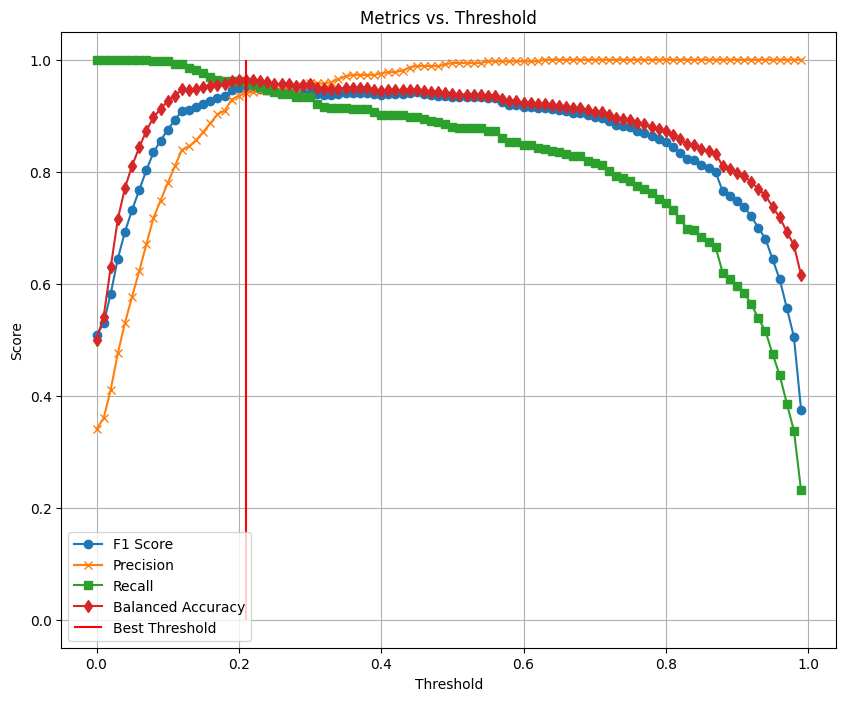

In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, balanced_accuracy_score, f1_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt

# Defining the cross-validation procedure
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluating the model with cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='f1')
print("Cross-Validation F1 Scores:", cv_scores)
print("Mean Cross-Validation F1 Score:", cv_scores.mean())

# Defining the parameter grid for GridSearchCV
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__penalty': ['l2'],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
}

# Creating the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='f1', n_jobs=-1)

# Fitting the model using grid search with validation set
grid_search.fit(X_valid, y_valid)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation F1 Score:", grid_search.best_score_)

# Using the best estimator to make predictions
best_pipeline = grid_search.best_estimator_

# Predicting on the test data with the best model
y_pred_best = best_pipeline.predict(X_test)
y_pred_prob_best = best_pipeline.predict_proba(X_test)[:, 1]

# Evaluating the best model
auc_best = roc_auc_score(y_test, y_pred_prob_best)
cm_best = confusion_matrix(y_test, y_pred_best)
balanced_acc_best = balanced_accuracy_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

print("Confusion Matrix for Best Model:")
print(cm_best)
print("\nAUC Score for Best Model:", auc_best)
print("Balanced Accuracy Score for Best Model:", balanced_acc_best)
print("F1 Score for Best Model:", f1_best)

# Define a range of thresholds
thresholds = np.arange(0.0, 1.0, 0.01)

# Initialize variables to store the best threshold and the best F1 score
best_threshold = 0.0
best_f1 = 0.0

# Initialize lists to store metrics for each threshold
f1_scores = []
precision_scores = []
recall_scores = []
balanced_acc_scores = []

# Iterate over thresholds to calculate metrics
for threshold in thresholds:
    y_pred_custom = (y_pred_prob_best >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred_custom)
    precision = precision_score(y_test, y_pred_custom)
    recall = recall_score(y_test, y_pred_custom)
    balanced_acc = balanced_accuracy_score(y_test, y_pred_custom)

    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)
    balanced_acc_scores.append(balanced_acc)

    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

# Show trend in the figure
plt.figure(figsize=(10, 8))

plt.plot(thresholds, f1_scores, label='F1 Score', marker='o')
plt.plot(thresholds, precision_scores, label='Precision', marker='x')
plt.plot(thresholds, recall_scores, label='Recall', marker='s')
plt.plot(thresholds, balanced_acc_scores, label='Balanced Accuracy', marker='d')
plt.vlines(best_threshold, 0, 1.0, label="Best Threshold", colors='r')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Metrics vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()

# V3: Logistic Regression with new preprocessing and optimizations

Best Threshold: 0.37
Confusion Matrix at Best Threshold:
[[754   9]
 [ 20 374]]

AUC Score: 0.9970161864401141
Balanced Accuracy Score: 0.9687215173872836
Best F1 Score: 0.9626769626769627


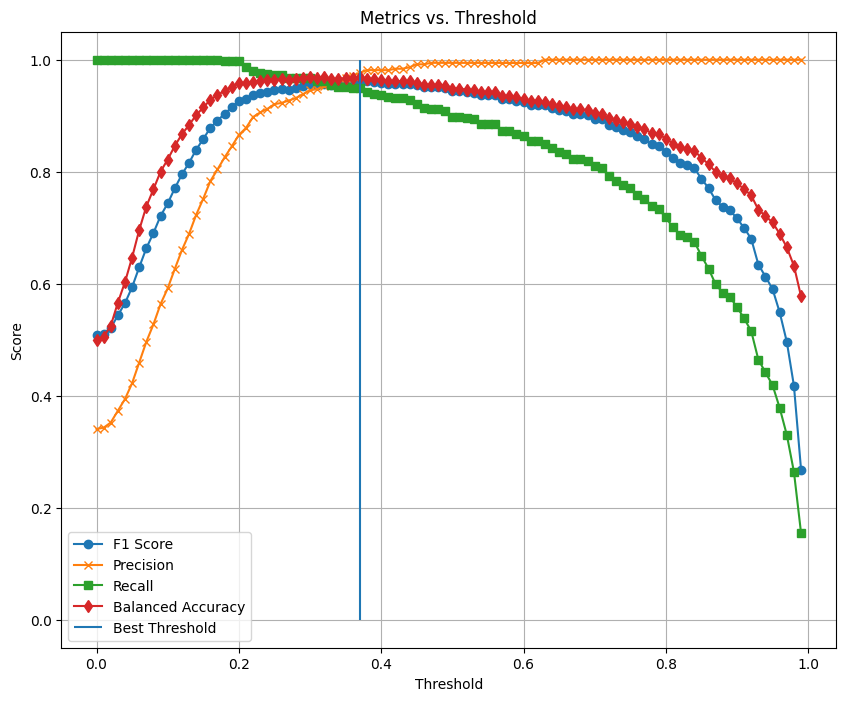

In [6]:
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

# define a range of thresholds
thresholds = np.arange(0.0, 1.0, 0.01)

# initialize variables to store the best threshold and the best F1 score
best_threshold = 0.0
best_f1 = 0.0

# initialize lists to store metrics for each threshold
f1_scores = []
precision_scores = []
recall_scores = []
balanced_acc_scores = []

# iterate over thresholds to calculate metrics
for threshold in thresholds:
    y_pred_custom = (y_pred_prob >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred_custom)
    precision = precision_score(y_test, y_pred_custom)
    recall = recall_score(y_test, y_pred_custom)
    balanced_acc = balanced_accuracy_score(y_test, y_pred_custom)

    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)
    balanced_acc_scores.append(balanced_acc)

    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

# evaluate the model with the best threshold
y_pred_best = (y_pred_prob >= best_threshold).astype(int)
auc = roc_auc_score(y_test, y_pred_prob)
cm = confusion_matrix(y_test, y_pred_best)
balanced_acc = balanced_accuracy_score(y_test, y_pred_best)

print("Best Threshold:", best_threshold)
print("Confusion Matrix at Best Threshold:")
print(cm)
print("\nAUC Score:", auc)
print("Balanced Accuracy Score:", balanced_acc)
print("Best F1 Score:", best_f1)

# show trend in the figure
plt.figure(figsize=(10, 8))

plt.plot(thresholds, f1_scores, label='F1 Score', marker='o')
plt.plot(thresholds, precision_scores, label='Precision', marker='x')
plt.plot(thresholds, recall_scores, label='Recall', marker='s')
plt.plot(thresholds, balanced_acc_scores, label='Balanced Accuracy', marker='d')
plt.vlines(best_threshold, 0, 1.0, label="Best Threshold")


plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Metrics vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()